**Customer Segmentation Analysis**

**Assignment 4**

**Problem Statement**

**You own the mall and want to understand the customers who can quickly converge (Target Customers) so that the insight can be given to the marketing team and plan the strategy accordingly**

**Importing the necessary libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Downloading and Loading the Dataset**

In [5]:
data = pd.read_csv('C:\Kaggle\Input\Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Performing Visualizations**

**Univariate Analysis**

**Histplot**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

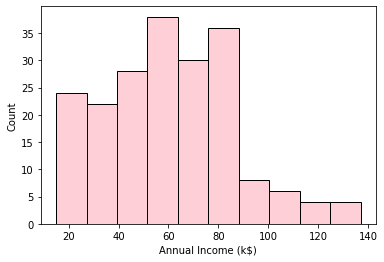

In [6]:
sns.histplot(data['Annual Income (k$)'], color="pink")

**Box Plot**

<AxesSubplot:xlabel='Annual Income (k$)'>

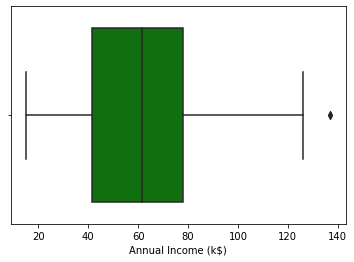

In [7]:
sns.boxplot(data['Annual Income (k$)'], color="green")

**Dist Plot**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

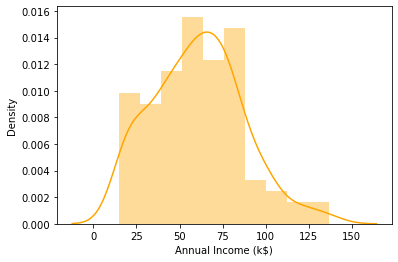

In [8]:
sns.distplot(data['Annual Income (k$)'], color="orange")

**Bi-variate Analysis**

**Barplot**

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

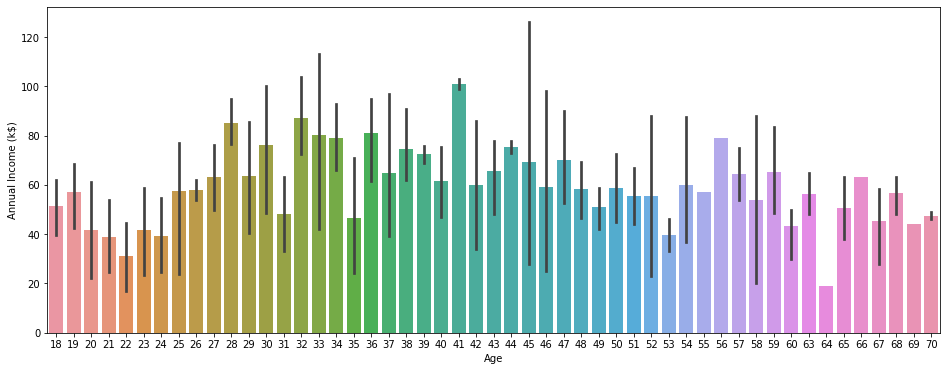

In [9]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

**Lineplot**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

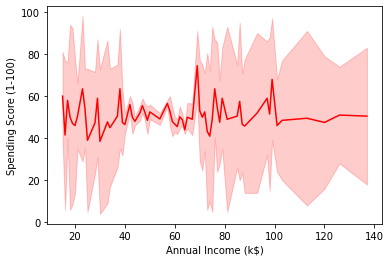

In [10]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="red")

**Scatter plot (Age vs Spending Score)**

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

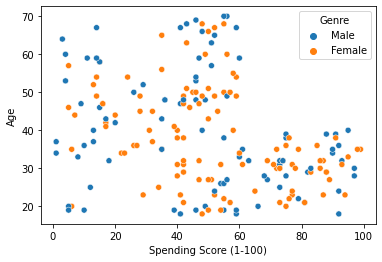

In [11]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Genre'])

**Gender vs Age Distribution**

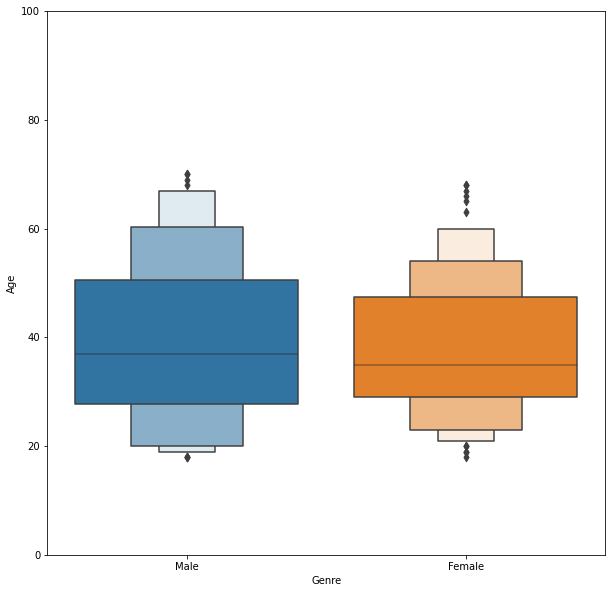

In [12]:
temp = pd.concat([data['Age'], data['Genre']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Genre', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

**Annual Income vs Gender Countplot**

<AxesSubplot:xlabel='Genre', ylabel='Annual Income (k$)'>

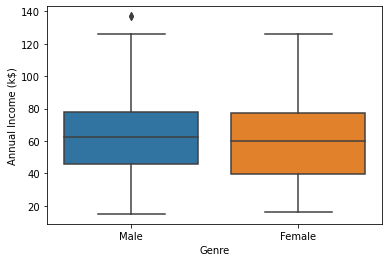

In [13]:
sns.boxplot(x=data['Genre'],y=data['Annual Income (k$)'])

**Multi-variate Analysis**

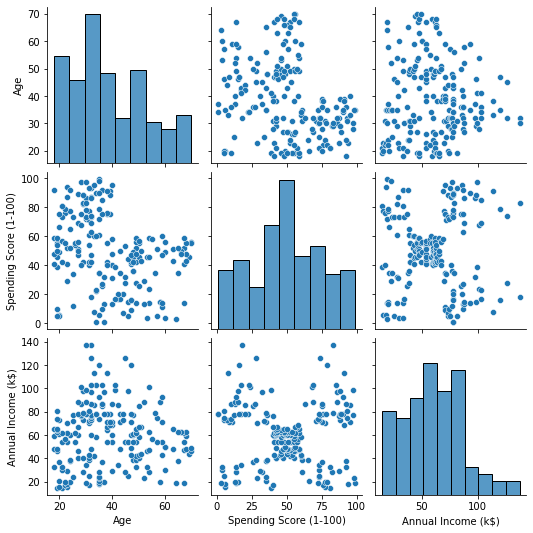

In [14]:
sns.pairplot(data=data[["Age", "Genre","Spending Score (1-100)","Annual Income (k$)"]])

**Correlation between the different attributes**

<AxesSubplot:>

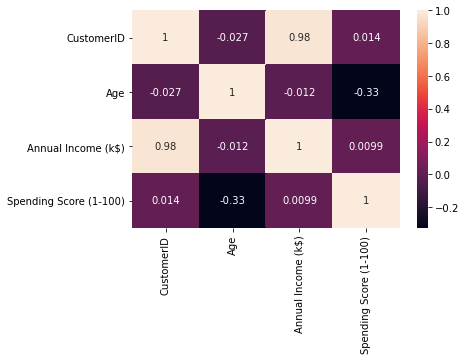

In [15]:
sns.heatmap(data.corr(),annot=True)

**Performing Descriptive Stats on the Dataset**

In [16]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [18]:
data.shape

(200, 5)

**Checking for null values**

In [19]:
data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [20]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Finding the outliers and replacing them**

In [21]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

**After removing outliers, boxplot will be like**

{'whiskers': [<matplotlib.lines.Line2D at 0x259b51c82b0>,
 'caps': [<matplotlib.lines.Line2D at 0x259b51c8940>,
 'boxes': [<matplotlib.lines.Line2D at 0x259b51b9f10>],
 'medians': [<matplotlib.lines.Line2D at 0x259b51d2040>],
 'fliers': [<matplotlib.lines.Line2D at 0x259b51d23a0>],
 'means': []}

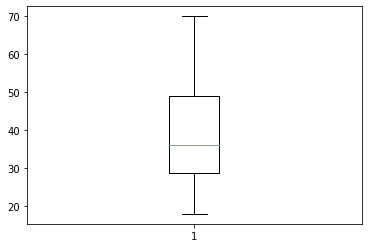

In [22]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x259b521f760>,
 'caps': [<matplotlib.lines.Line2D at 0x259b521fe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x259b521f400>],
 'medians': [<matplotlib.lines.Line2D at 0x259b522b520>],
 'fliers': [<matplotlib.lines.Line2D at 0x259b522b880>],
 'means': []}

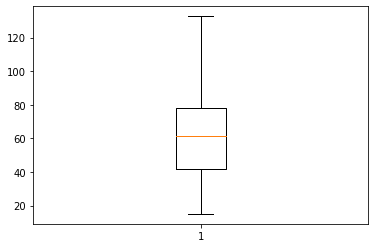

In [23]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x259b5280400>,
 'caps': [<matplotlib.lines.Line2D at 0x259b5280ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x259b52800a0>],
 'medians': [<matplotlib.lines.Line2D at 0x259b528d1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x259b528d520>],
 'means': []}

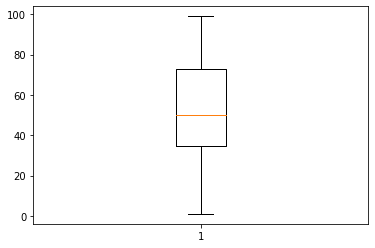

In [24]:
plt.boxplot(data['Spending Score (1-100)'])

**Checking for categorical columns and performing encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [26]:
data['Genre'] = l_en.fit_transform(data['Genre'])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


**Scaling the data**

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [34]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([7, 7, 4, 4, 4, 4, 3, 4, 5, 4, 5, 4, 3, 4, 1, 7, 4, 7, 5, 4, 7, 7,
       3, 7, 3, 7, 3, 7, 3, 4, 5, 4, 5, 7, 3, 4, 3, 4, 3, 4, 3, 7, 5, 4,
       3, 4, 3, 4, 4, 4, 3, 7, 4, 5, 3, 5, 3, 5, 4, 5, 5, 7, 3, 3, 5, 7,
       3, 3, 7, 4, 5, 3, 3, 3, 5, 7, 3, 7, 4, 3, 5, 7, 5, 3, 4, 5, 3, 4,
       4, 3, 3, 7, 5, 3, 4, 7, 3, 4, 5, 7, 4, 3, 5, 7, 5, 4, 3, 5, 5, 5,
       5, 4, 6, 7, 4, 4, 3, 3, 3, 3, 7, 6, 0, 2, 6, 0, 1, 2, 5, 2, 1, 2,
       6, 0, 1, 0, 6, 2, 1, 0, 6, 2, 6, 0, 1, 2, 5, 0, 6, 2, 1, 2, 6, 0,
       6, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 6, 2, 1, 2, 1, 2, 6, 0,
       5, 2, 5, 2, 6, 0, 1, 0, 6, 2, 6, 2, 6, 0, 6, 0, 1, 0, 6, 0, 6, 2,
       1, 2])

In [35]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [36]:
data1['kclus']  = pd.Series(res)
data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,7
1,1.0,0.057692,0.000000,0.816327,7
2,0.0,0.038462,0.008493,0.051020,4
3,0.0,0.096154,0.008493,0.775510,4
4,0.0,0.250000,0.016985,0.397959,4


In [37]:
data1['kclus'].unique()

array([7, 4, 3, 5, 1, 6, 0, 2])

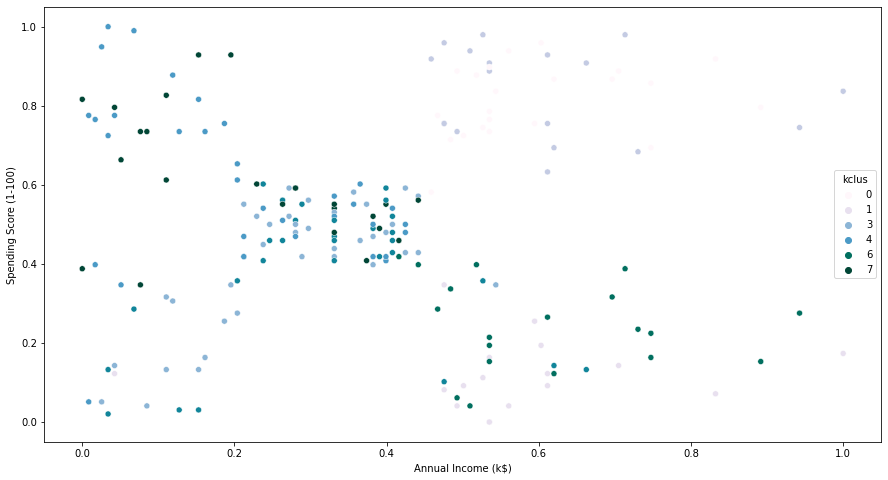

In [38]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [39]:
ind = data1.iloc[:,0:4]
ind.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [40]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,7
1,7
2,4
3,4
4,4


**Splitting dataset into train and test data**

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [42]:
x_test.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [43]:
y_train.head()

,kclus
116,3
67,3
78,4
42,5
17,7


In [44]:
y_test.head()

,kclus
58,4
40,3
34,3
102,5
184,6


In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[3.87079661],
       [3.68585793],
       [4.60728146],
       [3.44610653],
       [1.85269156]])

**Measuring the performance using metrics**

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.403389401193475
The Root mean squared error is:  1.8448277429596172
The Mean absolute error is:  1.3537325298790688
The accuracy is:  0.0657871258637811
